# Investigations of Heterogeneity with Limit Cycle Parameters

Goes from Limit Cycle Attractor -> Fixed point attractor in homogeneous case.


In [1]:
import numpy as np
import pandas as pd
import pylab
import matplotlib.pyplot as plt
from scipy import stats
from matplotlib.colors import ListedColormap
from turbo_colormap import *
import inspect
import os
import csv 
import time
import sys
import glob
import pandas as pd

from tvb.simulator.lab import *
from tvb.simulator.plot.tools import *

# Input Simulation Pipeline
from SimulationPipeline import *
from useful_fns import *

matplotlib.rcParams['figure.figsize'] = (20.0, 10.0)

In [2]:
# Now Import our data from our data folder:

# Get Scorr csv filenames in a folder
# LCycleCut
Scorr_files = glob.glob("do-not-track/Old/5_8_20/LCycle_*Scorr*.csv")
# LCycleCut - Rot5
#Scorr_files = glob.glob("D:\Simulations\\20_8_9\Rot5_LCycle_*Scorr*.csv")
# FixedPt
#Scorr_files = glob.glob("D:\Simulations\\2020_08_12\FixedPt_*Scorr*.csv")
# Hysteresis
#Scorr_files = glob.glob("D:\Simulations\\2020_08_12\Hysteresis_*Scorr*.csv")
# ReverseFixedPt
#Scorr_files = glob.glob("D:\Simulations\\2020_08_13\FixedPt_*Scorr*.csv")
# ReverseHysteresis
#Scorr_files = glob.glob("D:\Simulations\\2020_08_13\Hysteresis_*Scorr*.csv")
# ShorterLCycleCut = 1.2e4
#Scorr_files = glob.glob("D:\Simulations\\2020_08_14\Correct_Shorter_LCycle_*Scorr*.csv")
# ShortestLCycleCut = 1.2e3
#Scorr_files = glob.glob("D:\Simulations\\2020_08_14\Correct_Shortest_*Scorr*.csv")
# Hysteresis Better
Scorr_files = glob.glob("D:\Simulations\\2020_08_21\Hysteresis_*Scorr*.csv")

# The last number is of hrs_mins_secs HHMMSS

print(Scorr_files)

_08_21\\Hysteresis_G[0.25]_MouseCortex_Scorr_20200821-023549_.csv', 'D:\\Simulations\\2020_08_21\\Hysteresis_G[0.25]_MouseCortex_Scorr_20200821-024658_.csv', 'D:\\Simulations\\2020_08_21\\Hysteresis_G[0.2]_MouseCortex_Scorr_20200821-015119_.csv', 'D:\\Simulations\\2020_08_21\\Hysteresis_G[0.2]_MouseCortex_Scorr_20200821-020235_.csv', 'D:\\Simulations\\2020_08_21\\Hysteresis_G[0.2]_MouseCortex_Scorr_20200821-021351_.csv', 'D:\\Simulations\\2020_08_21\\Hysteresis_G[0.2]_MouseCortex_Scorr_20200821-022503_.csv', 'D:\\Simulations\\2020_08_21\\Hysteresis_G[0.2]_MouseCortex_Scorr_20200821-023616_.csv', 'D:\\Simulations\\2020_08_21\\Hysteresis_G[0.2]_MouseCortex_Scorr_20200821-024727_.csv', 'D:\\Simulations\\2020_08_21\\Hysteresis_G[0.35]_MouseCortex_Scorr_20200821-015107_.csv', 'D:\\Simulations\\2020_08_21\\Hysteresis_G[0.35]_MouseCortex_Scorr_20200821-020218_.csv', 'D:\\Simulations\\2020_08_21\\Hysteresis_G[0.35]_MouseCortex_Scorr_20200821-021330_.csv', 'D:\\Simulations\\2020_08_21\\Hysteres

In [3]:
# Okay, so we see that it's properly ordered by time (which is also the ordering for sigma) after the G value.  The issue is that G values are not sequential
# First of all, let's take every 6th filename (which corresponds to simulations with equal sigma)
# For S0,S1...S4,S5
Files_S0 = Scorr_files[0::6]
Files_S1 = Scorr_files[1::6]
Files_S2 = Scorr_files[2::6]
Files_S3 = Scorr_files[3::6]
Files_S4 = Scorr_files[4::6]
Files_S5 = Scorr_files[5::6]

S0 = SCFC_sort(Files_S0)
S1 = SCFC_sort(Files_S1)
S2 = SCFC_sort(Files_S2)
S3 = SCFC_sort(Files_S3)
S4 = SCFC_sort(Files_S4)
S5 = SCFC_sort(Files_S5)

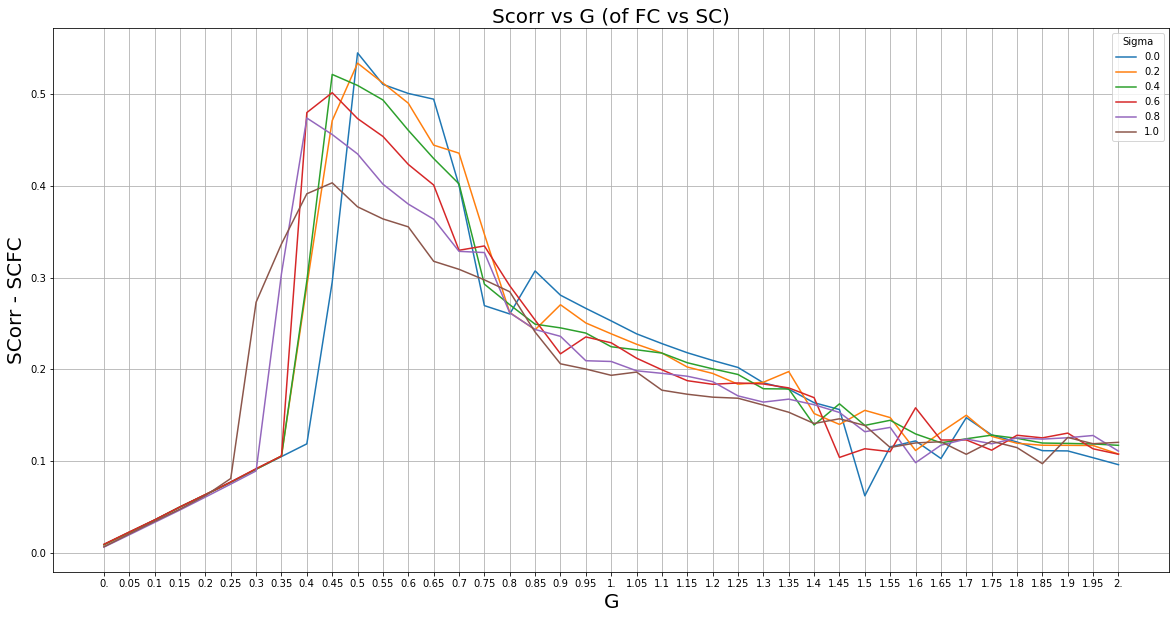

In [4]:
# Graph it: 
plt.plot(S0[0],S0[1])
plt.plot(S1[0],S1[1])
plt.plot(S2[0],S2[1])
plt.plot(S3[0],S3[1])
plt.plot(S4[0],S4[1])
plt.plot(S5[0],S5[1])
plt.xlabel('G', fontsize=20)
plt.ylabel('SCorr - SCFC', fontsize=20)
plt.title('Scorr vs G (of FC vs SC)', fontsize=20)
plt.grid()
plt.legend(('0.0','0.2','0.4','0.6','0.8','1.0'),title="Sigma")
plt.show()

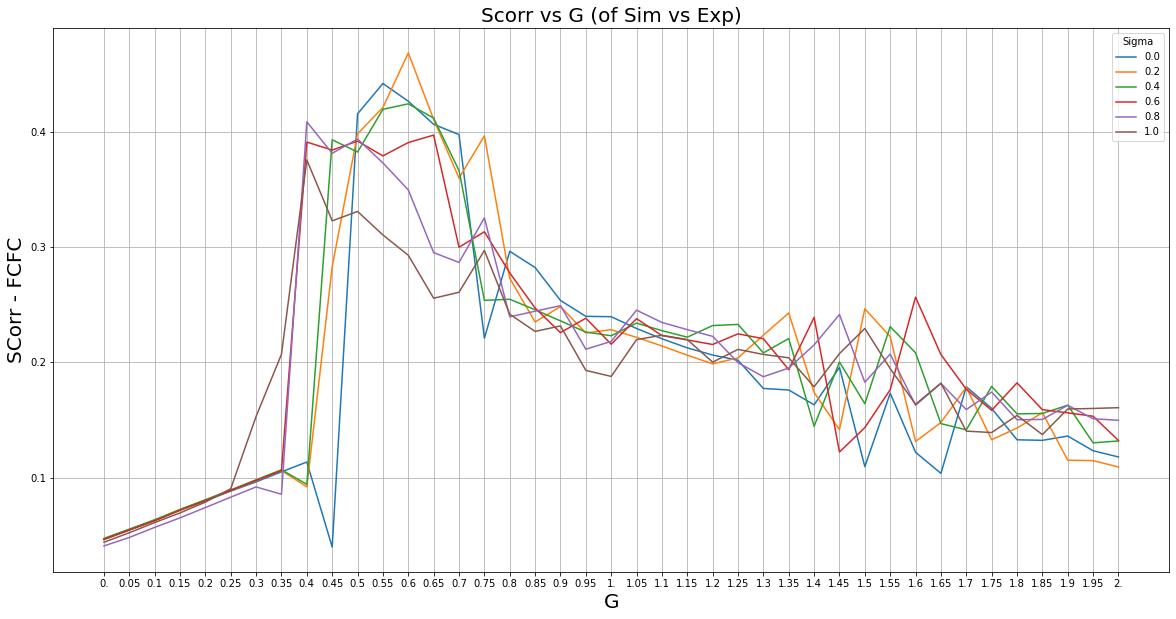

In [5]:
# Graph it: 
plt.plot(S0[0],S0[2])
plt.plot(S1[0],S1[2])
plt.plot(S2[0],S2[2])
plt.plot(S3[0],S3[2])
plt.plot(S4[0],S4[2])
plt.plot(S5[0],S5[2])
plt.xlabel('G', fontsize=20)
plt.ylabel('SCorr - FCFC', fontsize=20)
plt.title('Scorr vs G (of Sim vs Exp)', fontsize=20)
plt.grid()
plt.legend(('0.0','0.2','0.4','0.6','0.8','1.0'),title="Sigma")
plt.show()


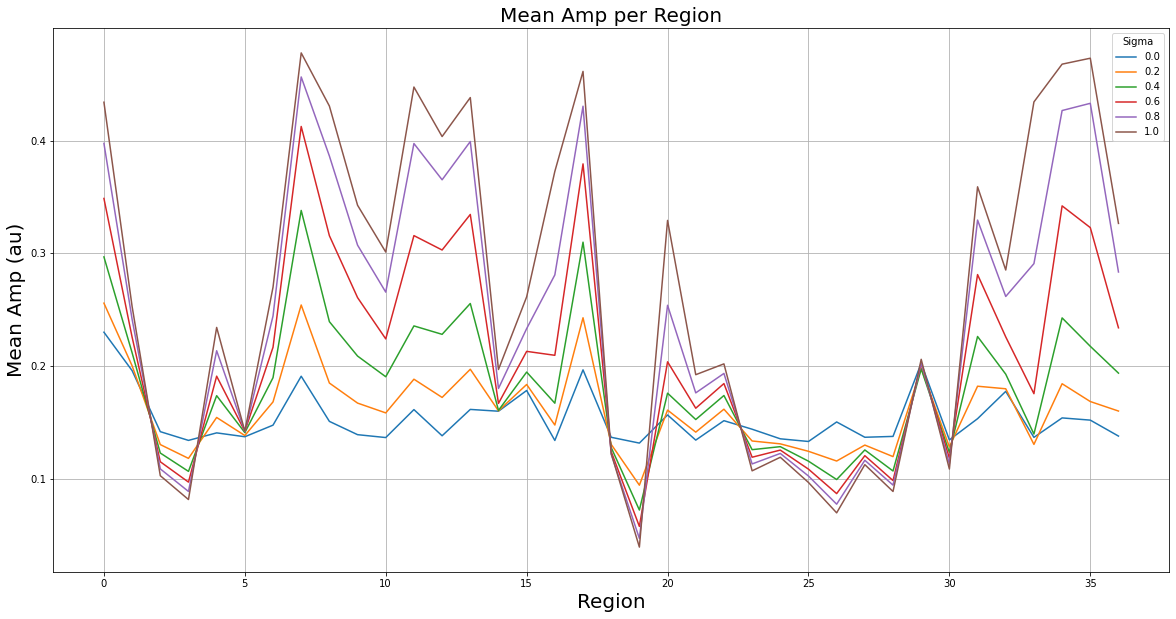

In [6]:
# Peaks is at: do-not-track\\LCycle_G[0.75]_MouseCortex_Scorr_20200805-031253_.csv

TFiles = glob.glob("do-not-track/Old/5_8_20/LCycle_G[0.25*Tseries*_.csv")

for item in TFiles:
    df = np.genfromtxt(item,delimiter="\t")
    bold_time = df[0]
    bold_data = df[1:]
    XX = list(map(np.median,bold_data))

    plt.plot(XX)

plt.grid()
plt.xlabel('Region', fontsize=20)
plt.ylabel('Mean Amp (au)', fontsize=20)
plt.title('Mean Amp per Region', fontsize=20)
plt.legend(("0.0","0.2","0.4","0.6","0.8","1.0"),title="Sigma")

In [49]:
TseriesFile = glob.glob("D:/Simulations/2020_08_21/Hysteresis_G[[]0.6[]]*Tseries*_.csv")[0]
ScorrFile = glob.glob("D:/Simulations/2020_08_21/Hysteresis_G[[]0.6[]]*SCorr*_.csv")[0]
FCMFile = glob.glob("D:/Simulations/2020_08_21/Hysteresis_G[[]0.6[]]*FCM*_.csv")[0]
print(TseriesFile)

D:/Simulations/2020_08_21\Hysteresis_G[0.6]_MouseCortex_Tseries_20200821-015117_.csv


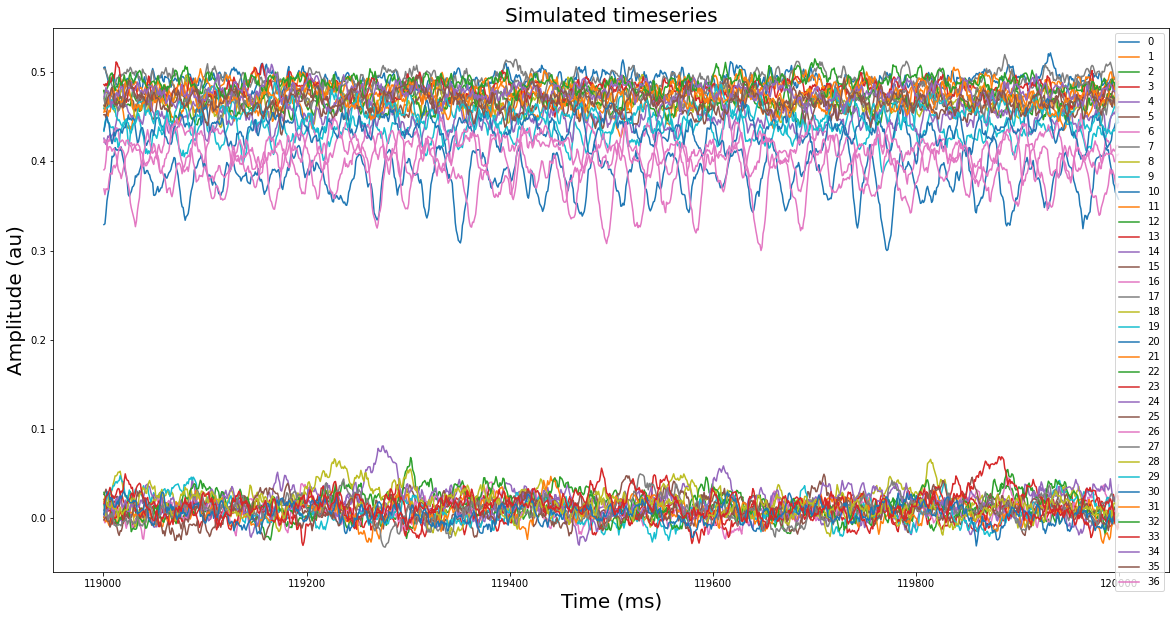

In [50]:
# Empty dict
ParamsDict = { }
ParamsDict["name"] = "MouseCortex"
#ParamsDict["G"] = np.array([1.9]) 
ParamsDict["REMOVE"] = [7]
ParamsDict["BINARY"]=True

# Read file import data
#df = pd.read_csv(all_files[11],delimiter="\t",header=None)
# Genfromtxt gives us a np array. 
df = np.genfromtxt(TseriesFile,delimiter="\t")

bold_time = df[0]
bold_data = df[1:]

# plt.subplots()

#plt.figure(num=None, figsize=(60, 30), dpi=80, facecolor='w', edgecolor='k')
# Let's only look at last 1000ms
for tseries in bold_data:
    #plt.plot(bold_time[10000:11000],tseries[10000:11000])
    plt.plot(bold_time[len(bold_time)-1000:len(bold_time)],tseries[len(bold_time)-1000:len(bold_time)])


plt.xlabel('Time (ms)', fontsize=20)
plt.ylabel('Amplitude (au)', fontsize=20)
plt.title('Simulated timeseries', fontsize=20)
#plt.legend(('0','1','2','3','4'))
plt.legend(range(38))
plt.show()

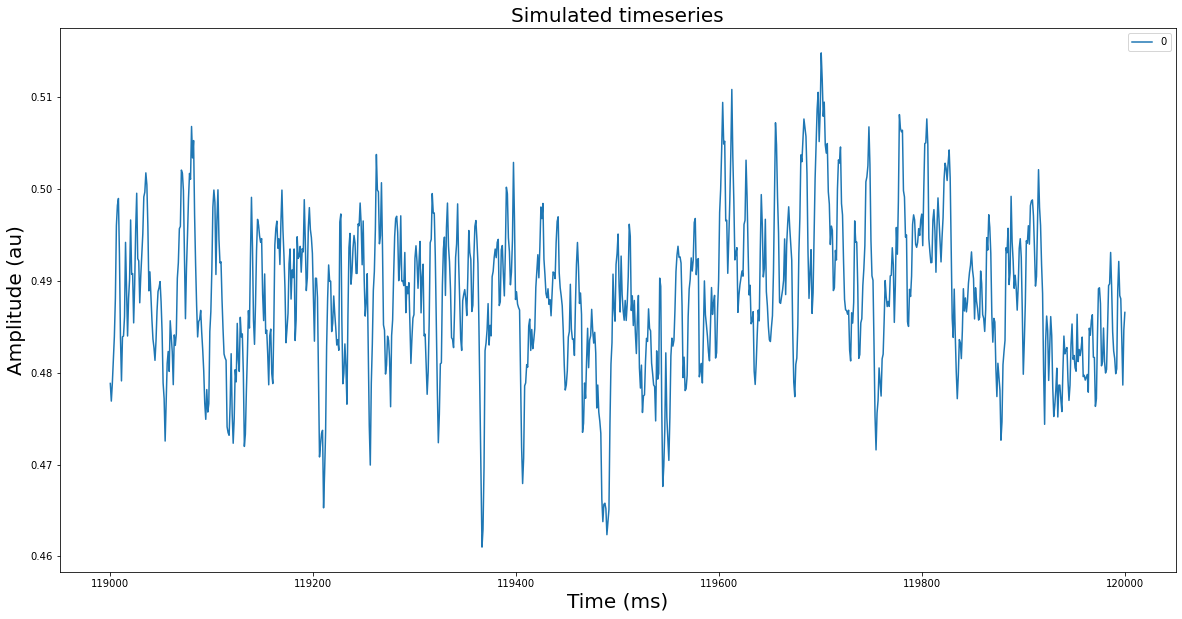

In [51]:
# Look at 1 region:

plt.plot(bold_time[len(bold_time)-1000:len(bold_time)],bold_data[32][len(bold_time)-1000:len(bold_time)])

plt.xlabel('Time (ms)', fontsize=20)
plt.ylabel('Amplitude (au)', fontsize=20)
plt.title('Simulated timeseries', fontsize=20)
#plt.legend(('0','1','2','3','4'))
plt.legend(range(38))
plt.show()

WARNING  File 'average_orientations' not found in ZIP.
WARNING  File 'cortical' not found in ZIP.
WARNING  File 'hemispheres' not found in ZIP.
WARNING  File 'areas' not found in ZIP.


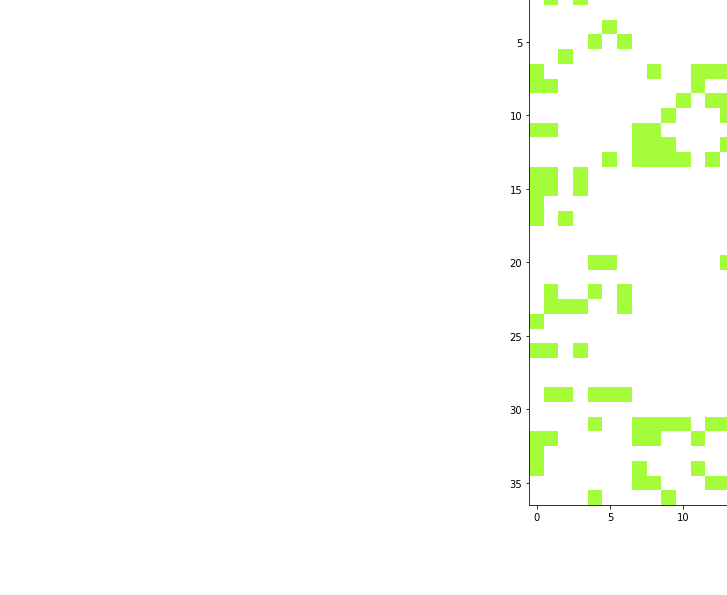

In [52]:
# Get rough feel for external currents.
# Load the connectivity data from a zip file. 
con = connectivity.Connectivity.from_file(os.getcwd() +"/Connectomes/" + ParamsDict["name"] + ".zip")

# Remove the ith row and column in centres, tract_lengths and weights. i.e. the specified region(s)
con.centres = np.delete(con.centres,ParamsDict["REMOVE"])
con.weights = np.delete(con.weights,obj=ParamsDict["REMOVE"],axis=0)
con.weights = np.delete(con.weights,obj=ParamsDict["REMOVE"],axis=1)
con.tract_lengths = np.delete(con.tract_lengths,obj=ParamsDict["REMOVE"],axis=0)
con.tract_lengths = np.delete(con.tract_lengths,obj=ParamsDict["REMOVE"],axis=1)

if ParamsDict["BINARY"]==True:
    con.weights = con.weights!=0
SCM = con.weights

# Visualize the structural connectivity matrix
plt.subplots()
cs=plt.imshow(np.log10(SCM), cmap=ListedColormap(turbo_colormap_data), aspect='equal', interpolation='none')
plt.title('Structural connectivity matrix', fontsize=20)
axcb=plt.colorbar(cs)
axcb.set_label('Log10(weights)', fontsize=20)
#plt.yticks([0,1,2,3])

Max 6.204026399417801
Median 2.7375925958342213
Min 0.4199383405737409


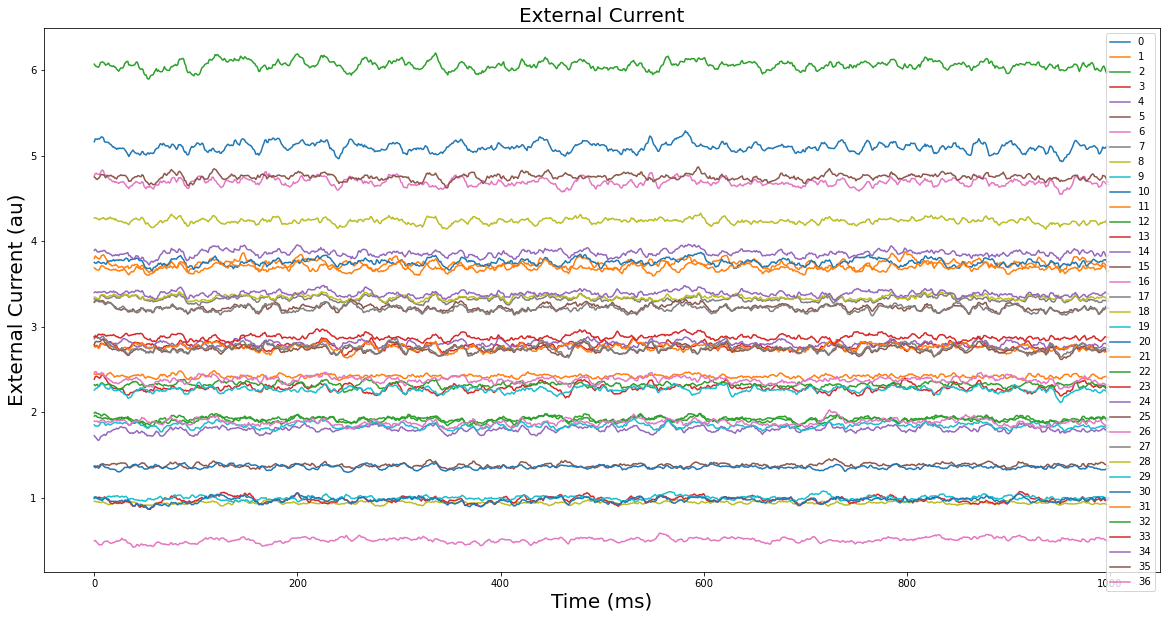

In [53]:
# External Current Calculator:
J_e = []
#len(bold_time)
for j in np.arange(1000):       
    t_0 = []
    # Specific column (or time point)
    for i in np.arange(SCM.shape[0]): 
        # Sum over all external currents (May need to do SCM[:,i] instead)  
        t  = sum(bold_data[:,j]*SCM[:,i])
        # To obtain currents to particular region
        t_0.append(t)
    J_e.append(t_0)

J_e = np.array(J_e)
print("Max",np.max(J_e))
print("Median",np.median(J_e))
print("Min",np.min(J_e))

plt.plot(J_e)
plt.xlabel('Time (ms)', fontsize=20)
plt.ylabel('External Current (au)', fontsize=20)
plt.title('External Current', fontsize=20)
#plt.legend(('0','1','2','3','4'))
plt.legend(range(38))
plt.show()

Text(0.5, 1.0, 'Mean External Current per Region')

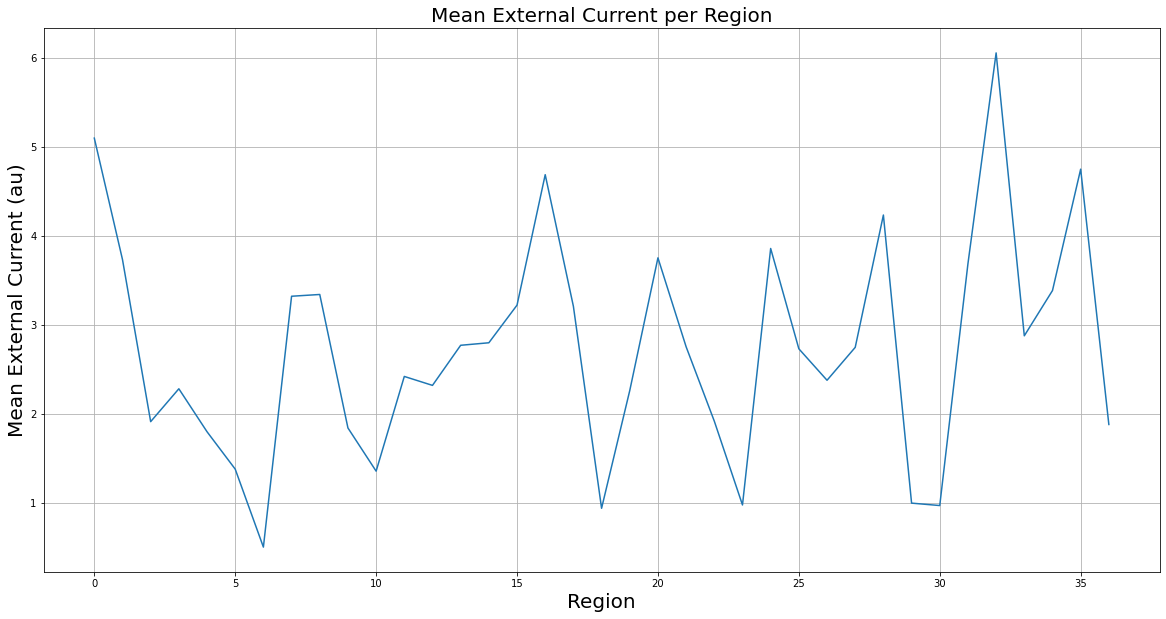

In [54]:
df = pd.DataFrame(J_e)
plt.plot(df.sum(axis=0)/1000)
plt.grid()
plt.xlabel('Region', fontsize=20)
plt.ylabel('Mean External Current (au)', fontsize=20)
plt.title('Mean External Current per Region', fontsize=20)

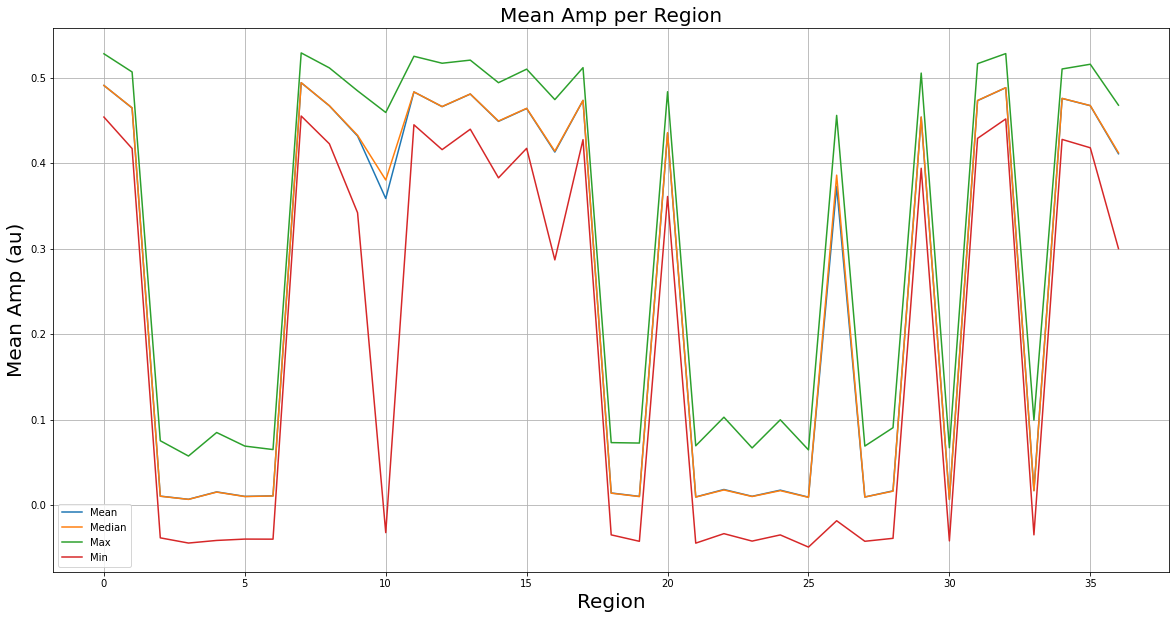

In [55]:
# Mean Amplitude Calculator.

X = list(map(np.mean,bold_data))
XX = list(map(np.median,bold_data))
Y = list(map(np.max,bold_data))
Z = list(map(np.min,bold_data))
plt.plot(X)
plt.plot(XX)
plt.plot(Y)
plt.plot(Z)
plt.grid()
plt.xlabel('Region', fontsize=20)
plt.ylabel('Mean Amp (au)', fontsize=20)
plt.title('Mean Amp per Region', fontsize=20)
plt.legend(("Mean","Median","Max","Min"))

[5.00742051e-01 1.85776656e-85 4.26810594e-01 7.28089599e-31]


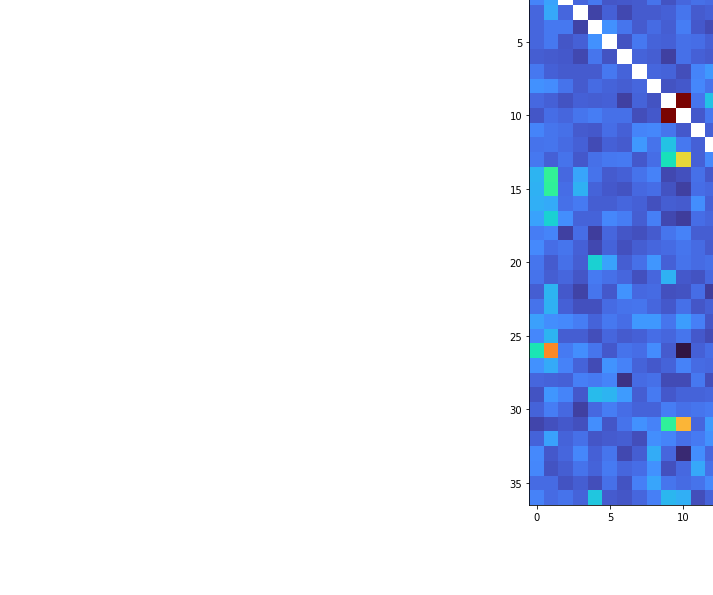

In [56]:
Scorra = np.genfromtxt(ScorrFile)
print(Scorra)

# Plot Simulated FCM
FCM_sim = np.genfromtxt(FCMFile,delimiter="\t")

# ListedColormap(turbo_colormap_data)
cs=plt.imshow(FCM_sim, cmap=ListedColormap(turbo_colormap_data), aspect='equal', interpolation='none')
plt.title('Functional connectivity matrix', fontsize=20)
axcb=plt.colorbar(cs)
axcb.set_label('Correlation', fontsize=20)
#plt.yticks([0,1,2,3])
plt.show()

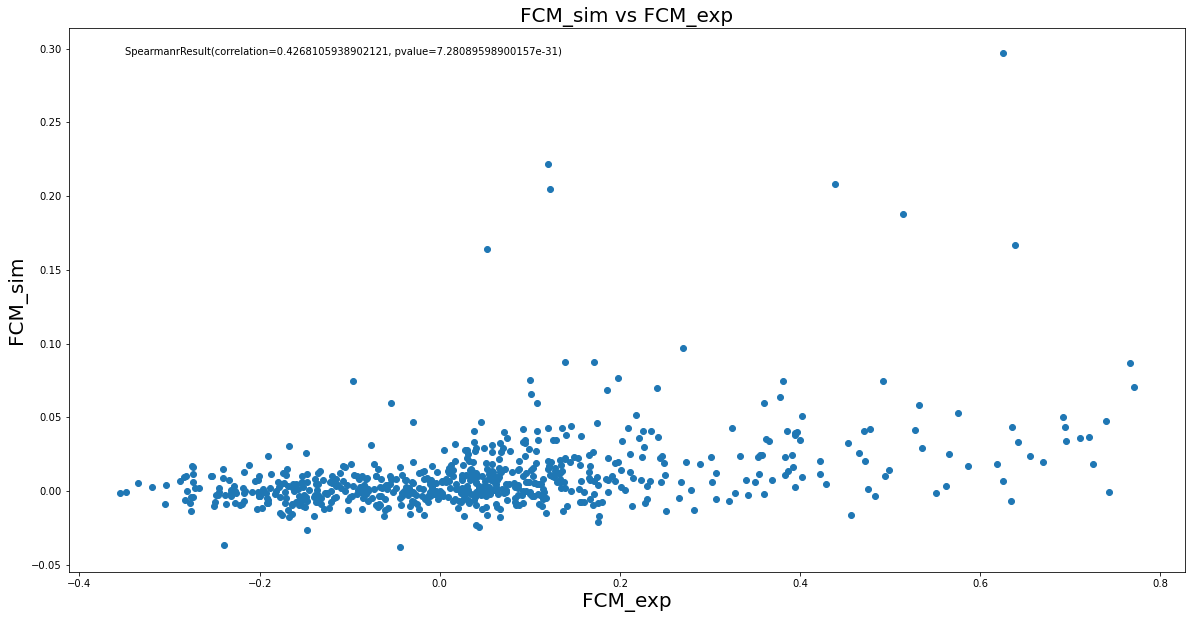

In [57]:
FCM_exp = np.genfromtxt('FCM_MouseExperimental.csv',delimiter = "\t")
# Set diagonals to NaN
np.fill_diagonal(FCM_exp,np.nan)

# Remove the ith row and column in FCM (i.e. the specified region)
FCM_exp = np.delete(FCM_exp,obj=ParamsDict["REMOVE"],axis=0)
FCM_exp = np.delete(FCM_exp,obj=ParamsDict["REMOVE"],axis=1)

FCM_Exp_U = FCM_exp[np.triu_indices(FCM_exp.shape[0], k = 1)]
FCM_Sim_U = FCM_sim[np.triu_indices(FCM_sim.shape[0], k = 1)]

# Spearman Correlation
SCorr = stats.spearmanr(a=FCM_Exp_U,b=FCM_Sim_U)
#print(SCorr)

# Scatterplot
plt.scatter(FCM_Exp_U,FCM_Sim_U)
plt.xlabel('FCM_exp', fontsize=20)
plt.ylabel('FCM_sim', fontsize=20)
plt.title('FCM_sim vs FCM_exp', fontsize=20)
plt.annotate(SCorr, xy=(0.05, 0.95), xycoords='axes fraction')
plt.show()